<a href="https://colab.research.google.com/github/jasminl/chaos/blob/main/henon_bifurcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def henon(x, y, a, b):
  out_x, out_y = (a - x**2 + b * y, x)
  return (out_x, out_y)

In [23]:
def create_bmap(initial_iterations, test_iterations, x, y, a, b, plot_coord='x'):
  fixed_x = []
  fixed_a = []

  # Discard first iterate iterations
  for n in range(0, initial_iterations):
    (x, y) = henon(x, y, a, b)

  # Check out total set of points visited
  x, y = henon(x, y, a, b)
  xy_coord = {(x, y)}
  for m in range(0, test_iterations):
    x, y = henon(x, y, a, b)
    xy_coord.add((x, y))

  if plot_coord == 'x':
    choice_coord = {v[0] for v in xy_coord if math.isnan(v[0]) is False}
  elif plot_coord == 'y':
    choice_coord = {v[1] for v in xy_coord if math.isnan(v[1]) is False}
  else:
    raise RuntimeError('Wrong coordinate choice')

  if len(choice_coord):
    fixed_a += len(choice_coord) * [a]
    fixed_x += choice_coord

  return fixed_a, fixed_x

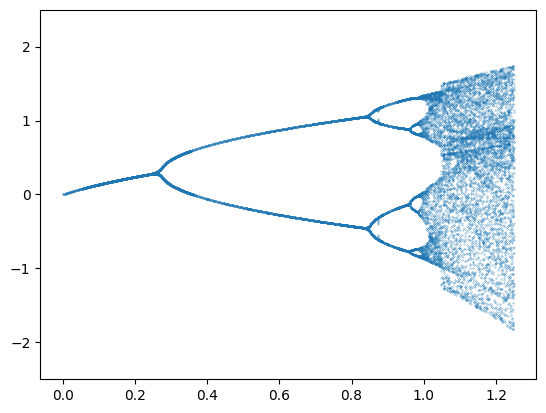

In [24]:
# Figure 2.16

# Number of iterations
iterate = 101
iterate_test = 30

# Starting point
x = 0
y = 0

b = 0.4

fixed_a = []
fixed_x = []
for a in np.arange(0, 1.25, 0.001):
  tmp_a, tmp_x = create_bmap(iterate, iterate_test, x, y, a, b)
  fixed_a += tmp_a
  fixed_x += tmp_x

plt.scatter(fixed_a, fixed_x, s = 0.05)
plt.ylim(-2.5, 2.5)
ax = plt.gca()
ax.set_aspect('auto', adjustable='box')
plt.show()


<ipython-input-9-45e16f07304a>:3: RuntimeWarning: overflow encountered in scalar power
  out_x, out_y = (a - x**2 + b * y, x)
<ipython-input-9-45e16f07304a>:3: RuntimeWarning: invalid value encountered in scalar add
  out_x, out_y = (a - x**2 + b * y, x)


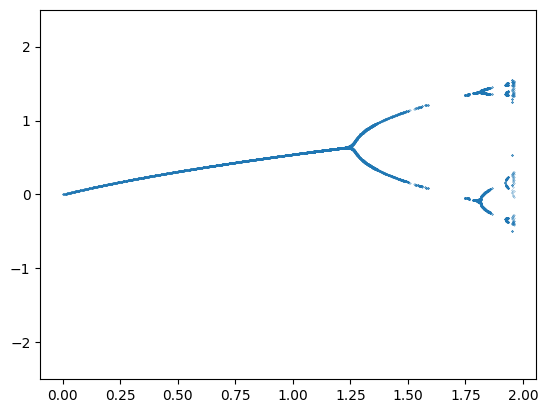

In [25]:
# Experiment 2.2
b = -0.3

fixed_a = []
fixed_x = []
for a in np.arange(0, 2.2, 0.001):
  tmp_a, tmp_x = create_bmap(iterate, iterate_test, x, y, a, b)
  fixed_a += tmp_a
  fixed_x += tmp_x

plt.scatter(fixed_a, fixed_x, s = 0.05)
plt.ylim(-2.5, 2.5)
plt.show()

<ipython-input-9-45e16f07304a>:3: RuntimeWarning: overflow encountered in scalar power
  out_x, out_y = (a - x**2 + b * y, x)
<ipython-input-9-45e16f07304a>:3: RuntimeWarning: invalid value encountered in scalar add
  out_x, out_y = (a - x**2 + b * y, x)


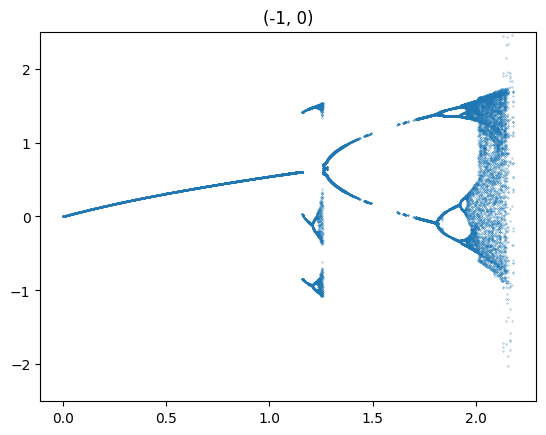

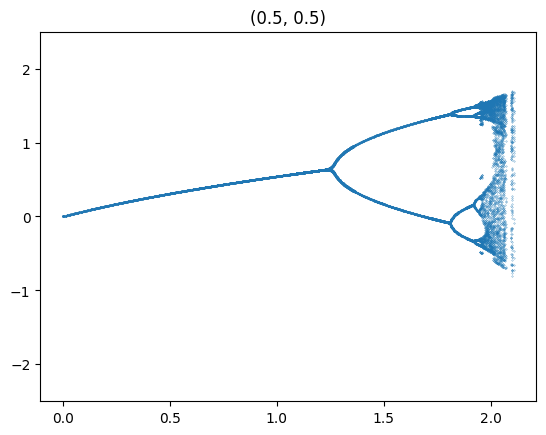

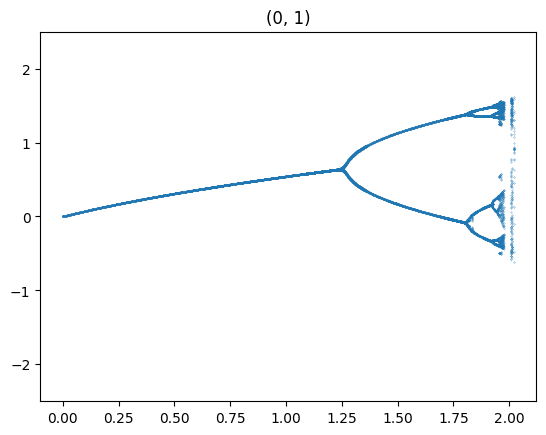

In [26]:
# Vary the starting point

b = -0.3

for start in [(-1,0), (0.5, 0.5), (0, 1)]:
  fixed_a = []
  fixed_x = []
  for a in np.arange(0, 2.2, 0.001):
    tmp_a, tmp_x = create_bmap(iterate, iterate_test, start[0], start[1], a, b)
    fixed_a += tmp_a
    fixed_x += tmp_x

  plt.scatter(fixed_a, fixed_x, s = 0.05)
  plt.title(start)
  plt.ylim(-2.5, 2.5)
  plt.show()

<ipython-input-9-45e16f07304a>:3: RuntimeWarning: overflow encountered in scalar power
  out_x, out_y = (a - x**2 + b * y, x)
<ipython-input-9-45e16f07304a>:3: RuntimeWarning: invalid value encountered in scalar add
  out_x, out_y = (a - x**2 + b * y, x)


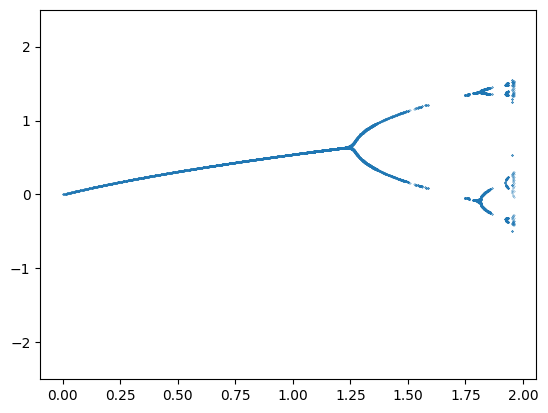

In [27]:
b = -0.3

fixed_a = []
fixed_x = []
for a in np.arange(0, 2.2, 0.001):
  tmp_a, tmp_x = create_bmap(iterate, iterate_test, x, y, a, b, plot_coord='y')
  fixed_a += tmp_a
  fixed_x += tmp_x

plt.scatter(fixed_a, fixed_x, s = 0.05)
plt.ylim(-2.5, 2.5)
plt.show()